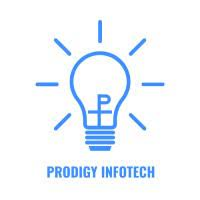

# PRODIGY INFOTECH DATA SCIENCE INTERNSHIP

# BY SHREYA BILTHERIA

Task 4 : Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

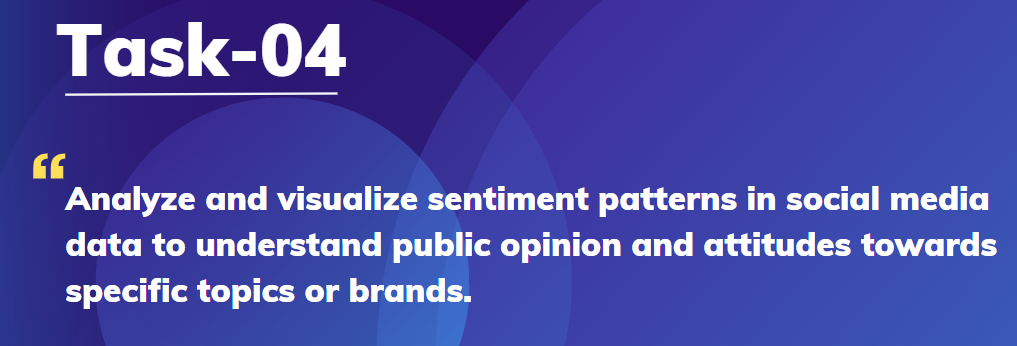

## About the Dataset

The Twitter Sentiment Analysis Dataset focuses on entity-level sentiment analysis in tweets. It categorizes sentiment about a specified entity into Positive, Negative, and Neutral classes. Messages not relevant to the entity are marked as Neutral for consistent analysis. The dataset contains tweets, each labeled with sentiment toward the mentioned entity. It's beneficial for training sentiment analysis models, especially for understanding public opinion about specific entities (like brands) on Twitter. This dataset aids in comprehensive and detailed sentiment analysis.The dataset is taken from Kaggle.

### Installing wordcloud

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


## IMPORTING THE LIBRARIES

In [2]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

## LOADING THE DATASET

In [3]:
#Loading the training and validation datasets
train_data = pd.read_csv("twitter_training.csv")
validation_data = pd.read_csv("twitter_validation.csv")

In [4]:
# displaying first 5 rows of training dataset
train_data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
# displaying first 5 rows of validation dataset
validation_data.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [6]:
# displaying last 5 rows of training dataset
train_data.tail()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [7]:
# displaying last 5 rows of validation dataset
validation_data.tail()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
998,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [8]:
#Training dataset
train_data

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [9]:
#validation dataset
validation_data

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [10]:
#assigning new column names to training dataset
train_data.columns=['TweetID','entity','sentiment','Tweet content']
train_data.head()

,TweetID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [11]:
#training dataset with new column names
train_data

,TweetID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [12]:
#validation dataset with new column names
validation_data.columns=['TweetID','entity','sentiment','Tweet content']
validation_data.head()

,TweetID,entity,sentiment,Tweet content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


## BASIC UNDERSTANDING OF DATASETS

### FOR TRAINING DATASET

In [13]:
# showing dimensions of the dataset
train_data.shape

(74681, 4)

In [14]:
#showing size of dataset
train_data.size

298724

In [15]:
# showing column names
train_data.columns

Index(['TweetID', 'entity', 'sentiment', 'Tweet content'], dtype='object')

In [16]:
# checking data types
train_data.dtypes

TweetID           int64
entity           object
sentiment        object
Tweet content    object
dtype: object

In [17]:
# checking for different data types
train_data.dtypes.value_counts()

object    3
int64     1
dtype: int64

In [18]:
# getting information about the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TweetID        74681 non-null  int64 
 1   entity         74681 non-null  object
 2   sentiment      74681 non-null  object
 3   Tweet content  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


### FOR VALIDATION DATASET

In [19]:
# showing dimensions of the dataset
validation_data.shape

(999, 4)

In [20]:
#showing size of dataset
validation_data.size

3996

In [21]:
# showing column names
validation_data.columns

Index(['TweetID', 'entity', 'sentiment', 'Tweet content'], dtype='object')

In [22]:
# checking data types
validation_data.dtypes

TweetID           int64
entity           object
sentiment        object
Tweet content    object
dtype: object

In [23]:
# checking for different data types
validation_data.dtypes.value_counts()

object    3
int64     1
dtype: int64

In [24]:
# getting information about the dataset
validation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TweetID        999 non-null    int64 
 1   entity         999 non-null    object
 2   sentiment      999 non-null    object
 3   Tweet content  999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


## DATA CLEANING AND PREPROCESSING

### Checking null values

In [25]:
#Returns True or False based on presence of null values in train_data dataset
train_data.isnull() 

,TweetID,entity,sentiment,Tweet content
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
74676,False,False,False,False
74677,False,False,False,False
74678,False,False,False,False
74679,False,False,False,False


In [26]:
#computes the sum of null values for each column in the train_data
train_data.isnull().sum() 

TweetID            0
entity             0
sentiment          0
Tweet content    686
dtype: int64

In [27]:
#Returns True or False based on presence of null values in validation_data dataset
validation_data.isnull() 

,TweetID,entity,sentiment,Tweet content
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
994,False,False,False,False
995,False,False,False,False
996,False,False,False,False
997,False,False,False,False


In [28]:
#computes the sum of null values for each column in the validation_data
validation_data.isnull().sum() 

TweetID          0
entity           0
sentiment        0
Tweet content    0
dtype: int64

### Checking duplicate values

In [29]:
#checks for duplicate rows in the train_data
train_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
74676    False
74677    False
74678    False
74679    False
74680    False
Length: 74681, dtype: bool

In [30]:
#calculates the total count of duplicate rows in the train_data
train_data.duplicated().sum()

2700

In [31]:
#checks for duplicate rows in the validation_data
validation_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Length: 999, dtype: bool

In [32]:
#calculates the total count of duplicate rows in the validation_data
validation_data.duplicated().sum()

0

In [33]:
#Checking the distribution of sentiment labels
train_sentiment_distribution = train_data.iloc[:, 2].value_counts()
validation_sentiment_distribution = validation_data.iloc[:, 2].value_counts()

In [34]:
#Checking the number of unique entities in the training set
unique_entities_train = train_data.iloc[:, 1].nunique()

train_sentiment_distribution, validation_sentiment_distribution, unique_entities_train

(Negative      22542
 Positive      20831
 Neutral       18318
 Irrelevant    12990
 Name: sentiment, dtype: int64,
 Neutral       285
 Positive      277
 Negative      266
 Irrelevant    171
 Name: sentiment, dtype: int64,
 32)

In [35]:
#Removing duplicate rows from the training set
train_data_cleaned = train_data.drop_duplicates()

In [36]:
#Dropping rows with missing tweet/message values
train_data_cleaned = train_data_cleaned.dropna(subset=[train_data.columns[3]])

In [37]:
#Verifying the cleaning
remaining_duplicates_train = train_data_cleaned.duplicated().sum()
remaining_missing_train = train_data_cleaned.isnull().sum()

In [38]:
remaining_duplicates_train

0

In [39]:
remaining_missing_train

TweetID          0
entity           0
sentiment        0
Tweet content    0
dtype: int64

Hence, we have treated null values and  duplicate values from both the datasets.

## DATA VISUALIZATION

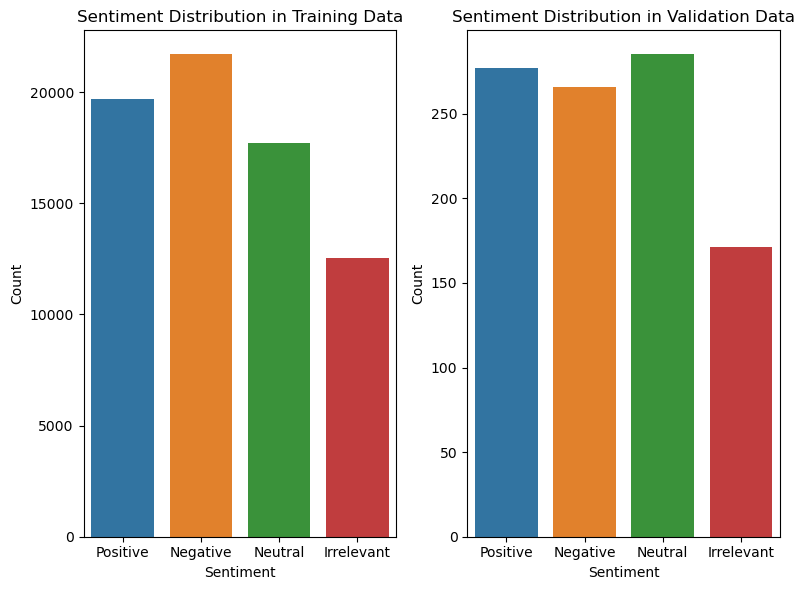

In [40]:
#Setting up the plots
fig, ax = plt.subplots(1, 2, figsize=(8,6))

#Plotting sentiment distribution for training data
sns.countplot(data=train_data_cleaned, x=train_data_cleaned.columns[2], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax=ax[0])
ax[0].set_title('Sentiment Distribution in Training Data')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Sentiment')

#Plotting sentiment distribution for validation data
sns.countplot(data=validation_data, x=validation_data.columns[2], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax=ax[1])
ax[1].set_title('Sentiment Distribution in Validation Data')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Sentiment')

plt.tight_layout()
plt.show()

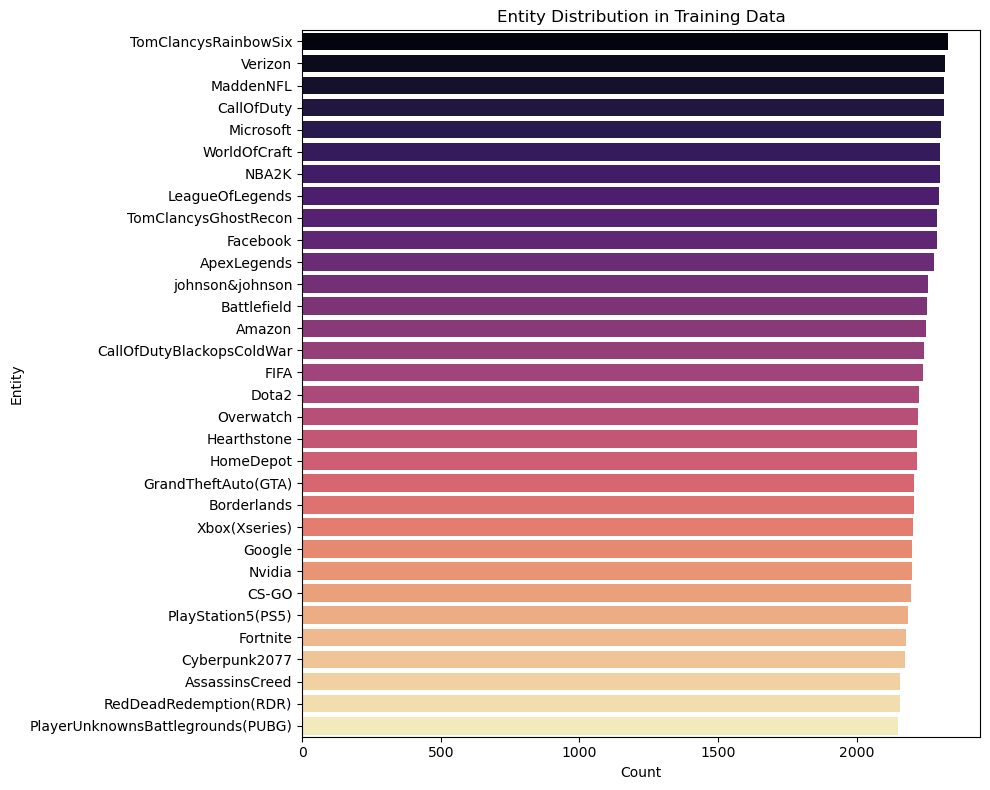

In [41]:
#Setting up the plot
plt.figure(figsize=(10,8))

#Plotting entity distribution for training data
sns.countplot(data=train_data_cleaned, y=train_data_cleaned.columns[1], order=train_data_cleaned[train_data_cleaned.columns[1]].value_counts().index, palette='magma')
plt.title('Entity Distribution in Training Data')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.tight_layout()
plt.show()

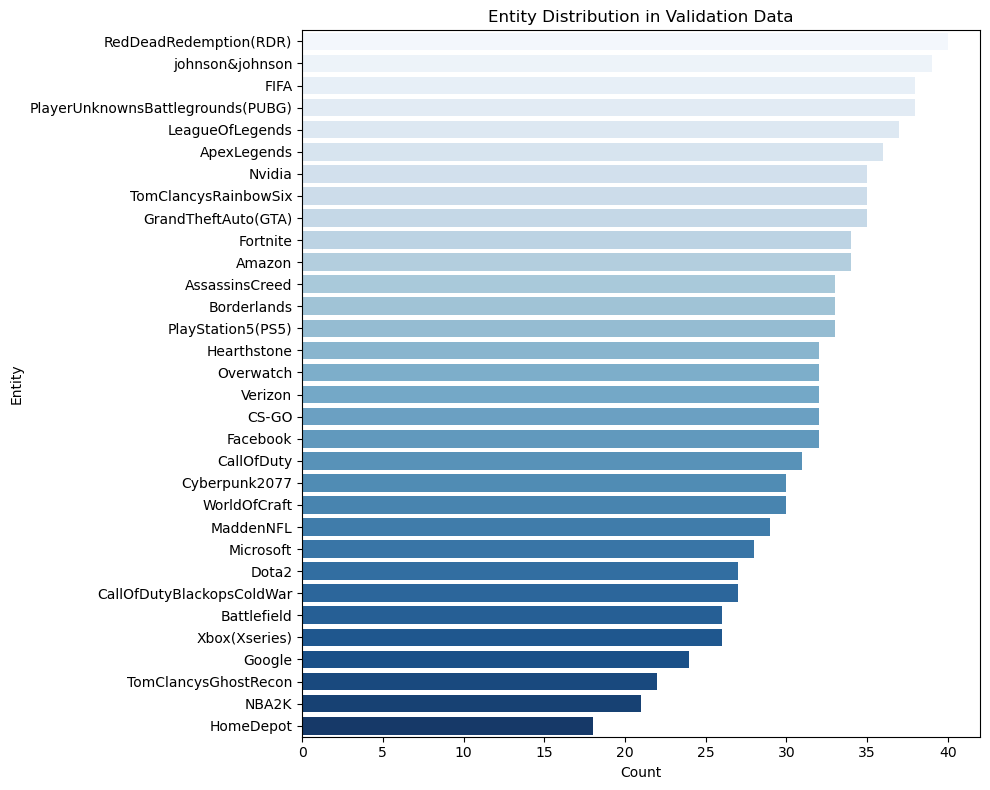

In [42]:
# Setting up the plot
plt.figure(figsize=(10,8))

# Plotting entity distribution for validation data
sns.countplot(data=validation_data, y=validation_data.columns[1], order=validation_data[validation_data.columns[1]].value_counts().index, palette='Blues')
plt.title('Entity Distribution in Validation Data')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.tight_layout()
plt.show()


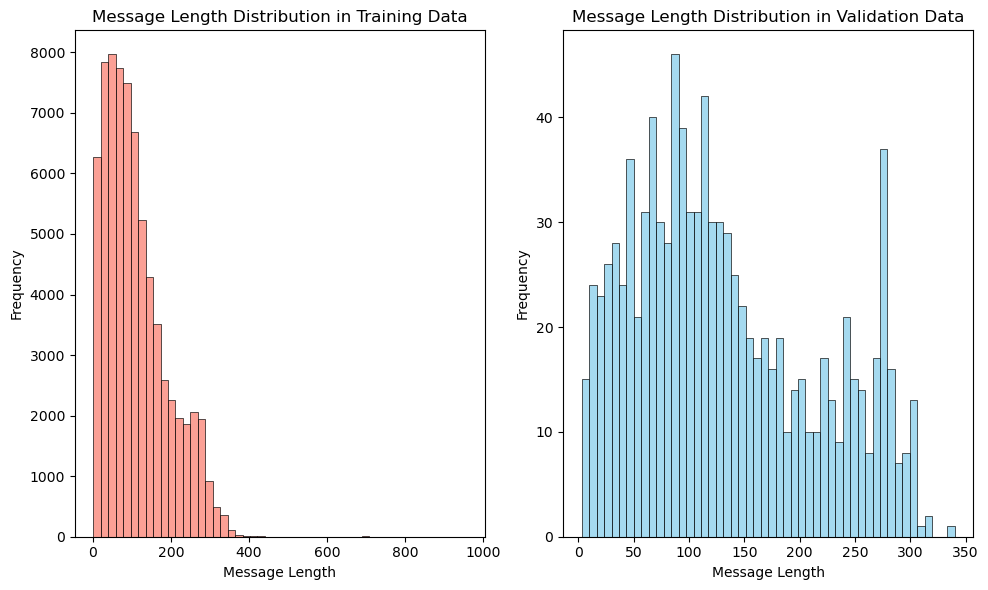

In [43]:
#Calculating the length of each message
train_data_cleaned['message_length'] = train_data_cleaned[train_data_cleaned.columns[3]].apply(len)
validation_data['message_length'] = validation_data[validation_data.columns[3]].apply(len)

#Setting up the plots
fig, ax = plt.subplots(1, 2, figsize=(10,6))

#Plotting message length distribution for training data
sns.histplot(train_data_cleaned['message_length'], bins=50, ax=ax[0], color='salmon')
ax[0].set_title('Message Length Distribution in Training Data')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Message Length')

#Plotting message length distribution for validation data
sns.histplot(validation_data['message_length'], bins=50, ax=ax[1], color='skyblue')
ax[1].set_title('Message Length Distribution in Validation Data')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Message Length')

plt.tight_layout()
plt.show()

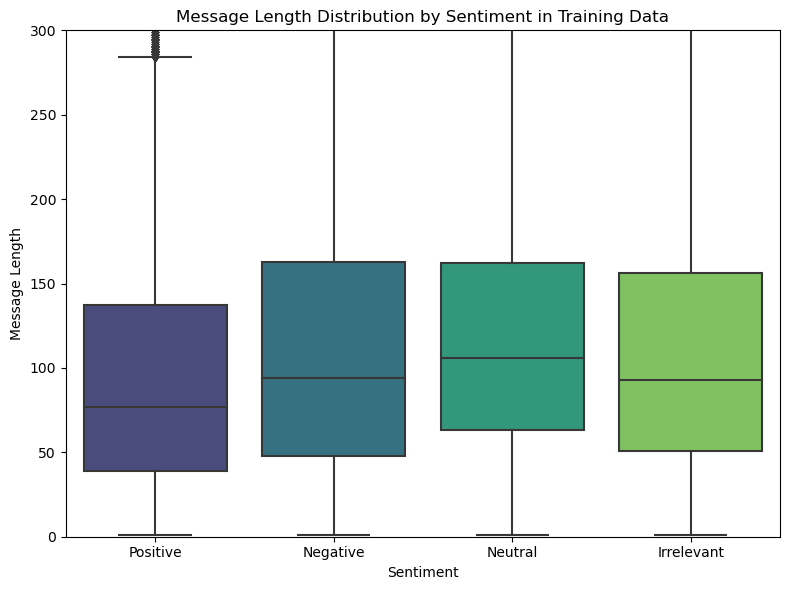

In [44]:
#Boxplot for training dataset
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_data_cleaned, x=train_data_cleaned.columns[2], y='message_length', palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.title('Message Length Distribution by Sentiment in Training Data')
plt.ylabel('Message Length')
plt.xlabel('Sentiment')
plt.ylim(0, 300)  # Limiting y-axis for better visualization
plt.tight_layout()
plt.show()

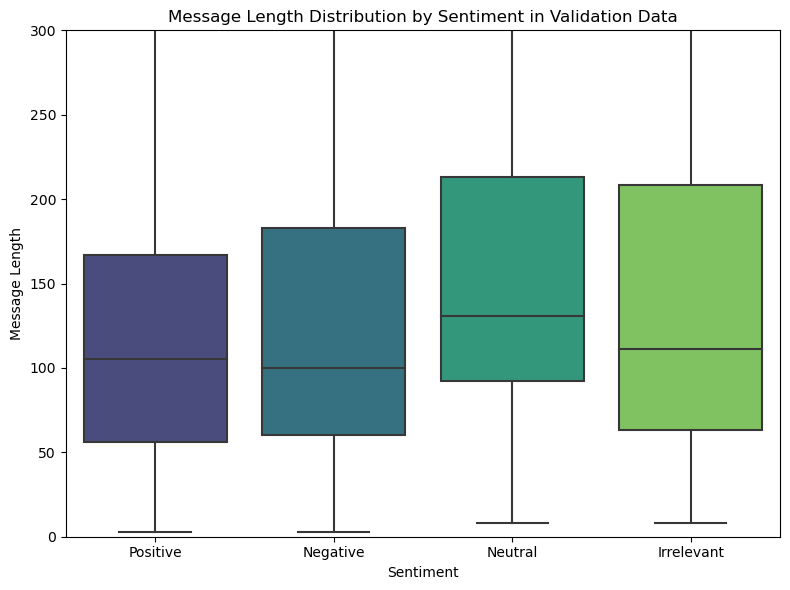

In [45]:
#Boxplot for validation dataset
plt.figure(figsize=(8, 6))
sns.boxplot(data=validation_data, x=validation_data.columns[2], y='message_length', palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.title('Message Length Distribution by Sentiment in Validation Data')
plt.ylabel('Message Length')
plt.xlabel('Sentiment')
plt.ylim(0, 300)  # Limiting y-axis for better visualization
plt.tight_layout()
plt.show()

In [46]:
#Generating the word cloud for the entire training dataset
all_text = " ".join(tweet for tweet in train_data_cleaned[train_data_cleaned.columns[3]])
wordcloud_all = WordCloud(background_color='white', width=800, height=400).generate(all_text)

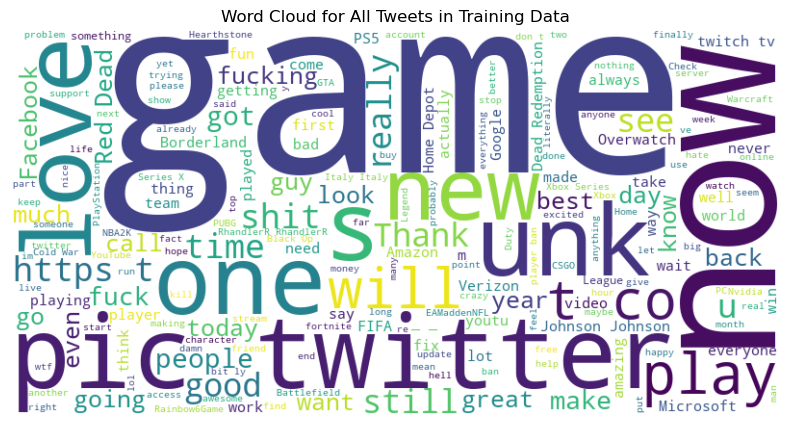

In [47]:
#Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All Tweets in Training Data')
plt.show()

In [48]:
#Initializing sentiment categories
sentiments = ['Positive', 'Negative', 'Neutral', 'Irrelevant']

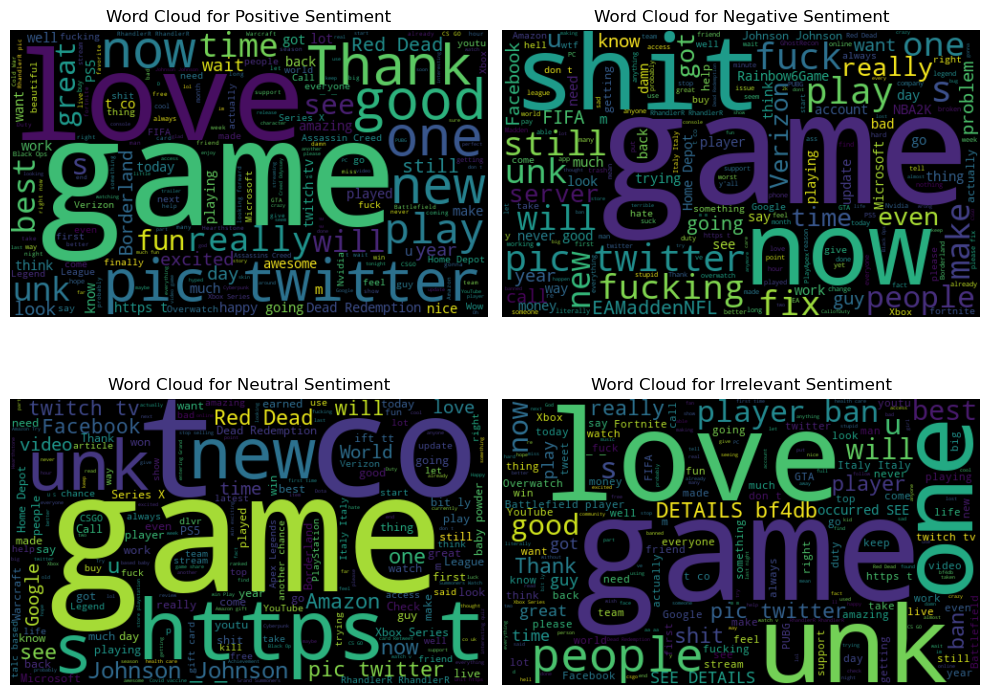

In [49]:
#Setting up the plots
fig, axs = plt.subplots(2, 2, figsize=(10,8))

#Generating and plotting word clouds for each sentiment
for sentiment, ax in zip(sentiments, axs.ravel()):
    sentiment_text = " ".join(tweet for tweet in train_data_cleaned[train_data_cleaned[train_data_cleaned.columns[2]] == sentiment][train_data_cleaned.columns[3]])
    wordcloud_sentiment = WordCloud(background_color='black', width=500, height=300).generate(sentiment_text)
    
    ax.imshow(wordcloud_sentiment, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Word Cloud for {sentiment} Sentiment')

plt.tight_layout()
plt.show()

In [50]:
#Alternative function to preprocess text without lemmatization or NLTK stopwords
def preprocess_text_simplified(text):
    #Converting to lowercase
    text = text.lower()
    #Simple tokenization using split (without relying on NLTK)
    tokens = text.split()
    #Removing special characters and numbers
    tokens = [token for token in tokens if token.isalpha()]
    return " ".join(tokens)

#Applying simplified preprocessing to training data
train_data_cleaned['processed_message_simplified'] = train_data_cleaned[train_data_cleaned.columns[3]].apply(preprocess_text_simplified)

#Extracting most frequent terms using CountVectorizer with simplified preprocessing
vectorizer_simplified = CountVectorizer(max_features=20)
X_simplified = vectorizer_simplified.fit_transform(train_data_cleaned['processed_message_simplified'])
frequent_terms_simplified = vectorizer_simplified.get_feature_names_out()

frequent_terms_simplified

array(['and', 'but', 'for', 'game', 'have', 'in', 'is', 'it', 'just',
       'my', 'not', 'of', 'on', 'so', 'that', 'the', 'this', 'to', 'with',
       'you'], dtype=object)

In [51]:
#Adjusting the labels: Convert "Irrelevant" labels to "Neutral"
train_data_cleaned[train_data_cleaned.columns[2]] = train_data_cleaned[train_data_cleaned.columns[2]].replace('Irrelevant', 'Neutral')
validation_data[validation_data.columns[2]] = validation_data[validation_data.columns[2]].replace('Irrelevant', 'Neutral')

In [52]:
#Checking the updated sentiment distribution in the training data
updated_train_sentiment_distribution = train_data_cleaned[train_data_cleaned.columns[2]].value_counts()
updated_train_sentiment_distribution

Neutral     30245
Negative    21698
Positive    19712
Name: sentiment, dtype: int64

In [53]:
#Checking the updated sentiment distribution in the validation data
updated_validation_sentiment_distribution = validation_data[validation_data.columns[2]].value_counts()
updated_validation_sentiment_distribution

Neutral     456
Positive    277
Negative    266
Name: sentiment, dtype: int64

In [54]:
#Initializing the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features for computational efficiency

#Fitting and transforming the preprocessed text from the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data_cleaned['processed_message_simplified'])

#Applying simplified preprocessing to the validation data
validation_data['processed_message_simplified'] = validation_data[validation_data.columns[3]].apply(preprocess_text_simplified)

#Transforming the preprocessed text from the validation data
X_validation_tfidf = tfidf_vectorizer.transform(validation_data['processed_message_simplified'])

#Extracting target labels for training and validation
y_train = train_data_cleaned[train_data_cleaned.columns[2]]
y_validation = validation_data[validation_data.columns[2]]

X_train_tfidf.shape, X_validation_tfidf.shape

((71655, 5000), (999, 5000))

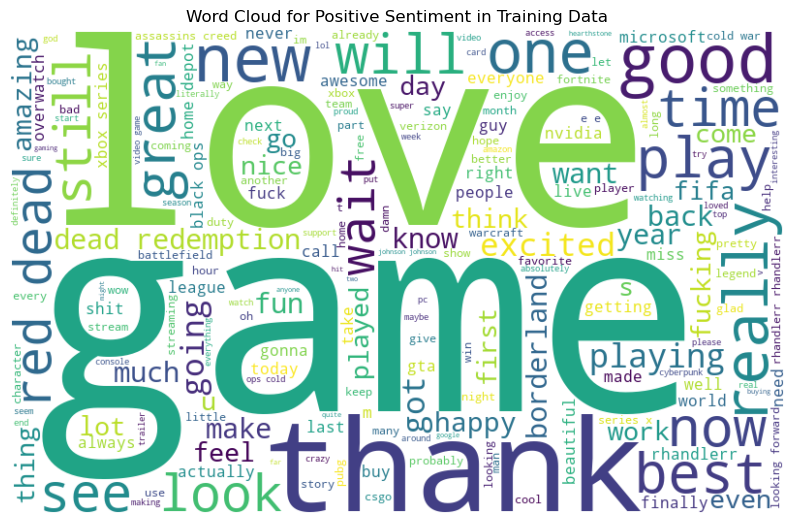

In [55]:
#Extracting text for Positive sentiment from the training dataset
positive_text = " ".join(tweet for tweet in train_data_cleaned[train_data_cleaned[train_data_cleaned.columns[2]] == 'Positive']['processed_message_simplified'])

#Generating word cloud for Positive sentiment
wordcloud_positive = WordCloud(background_color='white', width=800, height=500).generate(positive_text)

#Plotting the word cloud
plt.figure(figsize=(10,8))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment in Training Data')
plt.show()

In [56]:
#The target variable for training and validation 
y_train = train_data_cleaned[train_data_cleaned.columns[2]]
y_validation = validation_data[validation_data.columns[2]]

In [57]:
#Creating the ML pipeline with TF-IDF vectorization and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', LogisticRegression(solver='sag', multi_class='auto', max_iter=10000))  # using 'sag' solver for faster convergence
])

#Training the pipeline model using the training data
pipeline.fit(train_data_cleaned['processed_message_simplified'], y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('classifier',
                 LogisticRegression(max_iter=10000, solver='sag'))])

In [58]:
#Validating the model's performance on the training dataset
training_accuracy = pipeline.score(train_data_cleaned['processed_message_simplified'], y_train)
training_accuracy

0.7467029516432908

In [59]:
#Generating predictions on the training data
y_train_pred = pipeline.predict(train_data_cleaned['processed_message_simplified'])

In [60]:
#Creating a confusion matrix for training data
conf_matrix_train = confusion_matrix(y_train, y_train_pred, labels=['Positive', 'Negative', 'Neutral'])

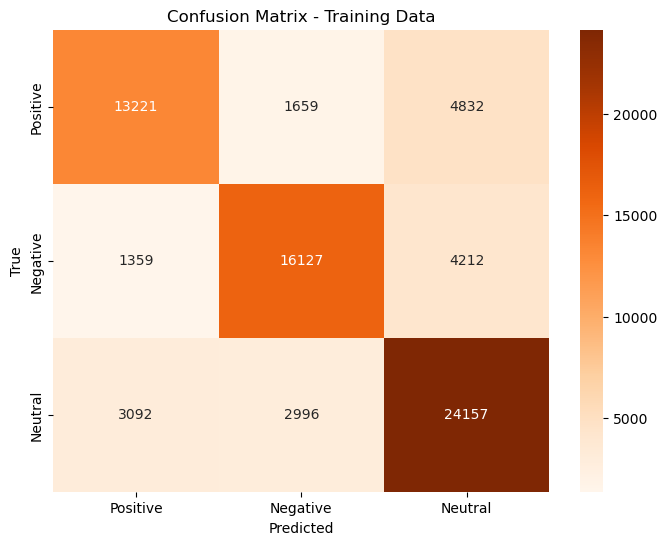

In [61]:
#Plotting the confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Oranges', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [62]:
#Validating the model's performance on the validation dataset
validation_accuracy = pipeline.score(validation_data['processed_message_simplified'], y_validation)
validation_accuracy

0.8048048048048048

In [63]:
#Generating predictions on the validation data
y_validation_pred = pipeline.predict(validation_data['processed_message_simplified'])

In [64]:
#Creating a confusion matrix for validation data
conf_matrix = confusion_matrix(y_validation, y_validation_pred, labels=['Positive', 'Negative', 'Neutral'])

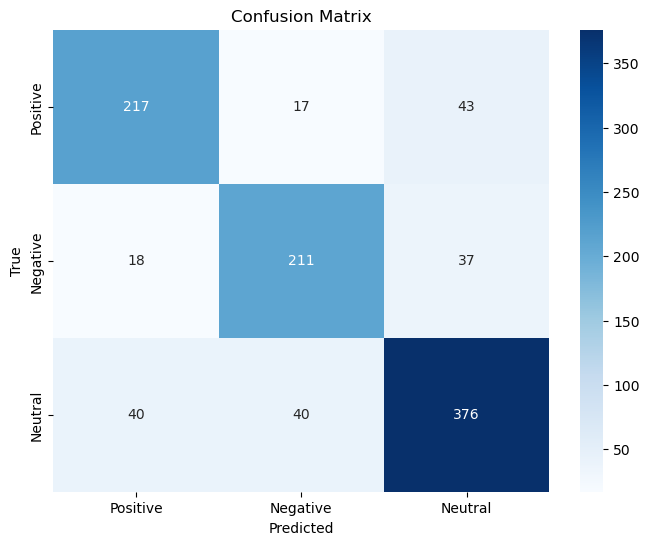

In [65]:
#Plotting the confusion matrix for validation data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## CONCLUSION

The sentiment analysis conducted on the Twitter dataset focusing on entity-level sentiment provided valuable insights into public opinion and attitudes toward specific entities mentioned in tweets. The analysis involved categorizing sentiments into three classes: Positive, Negative, and Neutral, with messages irrelevant to the entity considered as Neutral for consistency.

#### Key Findings:

- **Sentiment Distribution:** The sentiment distribution revealed that a significant portion of tweets expressed Neutral sentiment, followed by Positive and Negative sentiments, indicating a diverse range of opinions.
  
- **Entity-Specific Sentiment:** Analysis of sentiment towards the specified entities showcased varied perceptions. Entities received a mix of positive, negative, and neutral sentiments, reflecting the complexity of public opinion.

- **Message Length and Sentiment:** The examination of message length in relation to sentiment revealed interesting trends. While sentiment varied, there were instances where longer messages predominantly exhibited certain sentiments, indicating potential patterns in sentiment expression.

#### Insights:

- **Neutral Sentiment Dominance:** The prevalence of Neutral sentiment suggests a considerable amount of tweets might not express clear opinions or emotions towards the entities. Further analysis or context might be necessary to interpret these neutral sentiments accurately.

- **Diverse Public Opinion:** The diversity of sentiment towards entities highlights the multifaceted nature of public opinion. Understanding the nuances within sentiments can provide deeper insights into public perception.

- **Implications for Entities:** Entities mentioned in the dataset should consider the range of sentiments expressed. Positive sentiment can serve as an asset, while negative sentiments might signify areas needing attention or improvement.

## I would like to extend my heartfelt gratitude to the Prodigy InfoTech team for the wonderful opportunity to contribute to this project. This experience has been immensely enriching, elevating my skills and understanding in data science and analysis. I eagerly anticipate applying this newfound knowledge in my future pursuits. Thank you, Prodigy InfoTech, for this incredible learning journey.